In [ ]:
import numpy as np
from functools import *
from numpy.linalg import norm
from pylab import scatter, plot, legend, title

%matplotlib inline

<b>Задача 5.1.</b>
Функция $y=f(x)$ задана таблицей значений $y_0, y_1, ... y_n$ в точках $x_0, x_1, ... x_n$.

Используя метод наименьших квадратов, найти многочлен $P_m(x) = a_0 + a_1x + ... + a_mx^m$
наилучшего среднеквадратичного приближения оптимальной степени $m=m^*$.

За оптимальное значение $m^*$ принять ту степень многочлена, начиная с которой величина 2
$\sigma_m = \sqrt{ \frac {1} { n - m } \sum_{k=0}^{m} {(P_m(x_k} - y_k)^2 } $
стабилизируется или начинает возрастать.

In [ ]:
class Task1:
    x = np.arange(-2.1, 2.1, 0.3)
    
    y = np.array(
        [
            14.1982,
            11.4452,
            9.1586,
            7.2426,
            6.3640,
            4.8181,
            6.1066,
            3.9536,
            4.6872,
            4.7601,
            5.8511,
            7.1010,
            9.1792,
            11.4210,
            14.0970
        ]
    )


In [ ]:
x = Task1.x
y = Task1.y



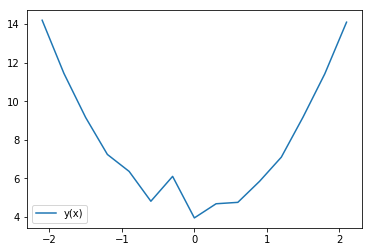

In [ ]:
plot(x, y, label='y(x)')
legend()


In [ ]:
class Poly:
    
    def __init__(self, size, coefs=None):
        self.size = size + 1
        self.powers = list(range(self.size))
        
        if coefs is None:
            self.coefs = np.ones((self.size,))
        else:
            assert len(coefs) == self.size
            self.coefs = np.array(coefs)
        
        
    def apply(self, point):
        return np.multiply(np.power(point, self.powers), self.coefs)
    
    def apply_and_sum(self, point):
        return np.sum(self.apply(point))
    
    def evaluate_in_points(self, points):
        return np.array(
            list(map(self.apply_and_sum, points))
        )
    
    def make_matrix(self, points):
        return np.array(
            list(map(self.apply, points))
        )


In [ ]:
class GrahmSystem:
    def __init__(self, x, y, poly_size):
        self.x = x
        self.y = y
        self.poly_size = poly_size
        
        self.operator_matrix, self.result_vector = self._make_system()
        self.solution = np.linalg.solve(self.operator_matrix, self.result_vector)
        
        
    def _make_system(self):
        assert len(self.x) == len(self.y)
        
        poly = Poly(self.poly_size)
        P = poly.make_matrix(self.x)
        
        grahm_matrix = P.T @ P
        result_vector = P.T @ self.y
        
        return grahm_matrix, result_vector

In [ ]:
gs = GrahmSystem(x, y, 5)

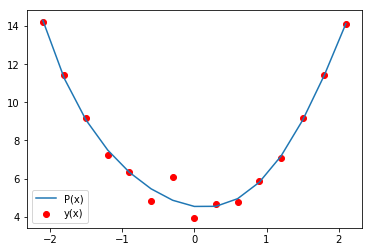

In [ ]:
pol = Poly(gs.poly_size, gs.solution)
scatter(x, y, label='y(x)', color='r')
plot(x, list(map(pol.apply_and_sum, x)), label='P(x)')
legend()


In [ ]:
from statistics import stdev

def evaluate_stdev_for_poly(x, y, poly_size):
    gs = GrahmSystem(x, y, poly_size)
    poly = Poly(gs.poly_size, gs.solution)
    
    return stdev(y - poly.evaluate_in_points(x))
    

In [ ]:
stdevs = list(map(partial(evaluate_stdev_for_poly, x, y), range(1, 10)))
min_stdev = np.argmin(stdevs)


Построить гистограмму зависимости $σ_m$ от $m$, на основании которой выбрать оптимальную степень $m^*$
многочлена наилучшего среднеквадратичного приближения.

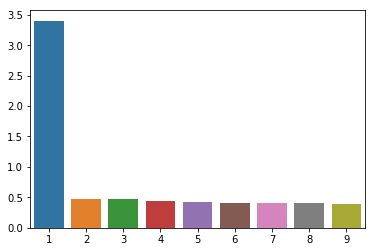

In [ ]:
from seaborn import barplot

barplot(list(range(1, 10)), stdevs)


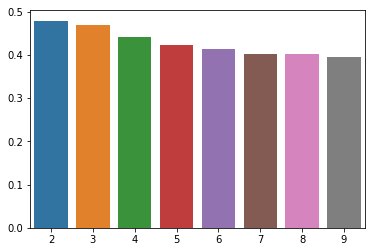

In [ ]:
barplot(list(range(2, 10)), stdevs[1:])

Как можно видеть, $ \sigma^2 $ достаточно хороша $ => $
исходная функция хорошо приближается многочленом второй степени.

На одном чертеже построить графики многочленов $P_m$, $m=0,1,2,..., m^*$,
и точечный график исходной функции

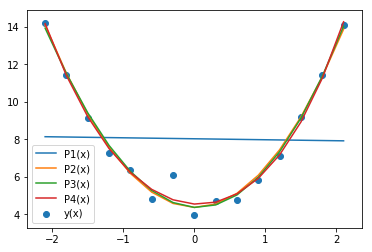

In [ ]:
for i in range(1, 5):
    gs = GrahmSystem(x, y, i)
    pol = Poly(i, gs.solution)
    
    plot(x, pol.evaluate_in_points(x), label='P{}(x)'.format(i))

scatter(x, y, label='y(x)')
legend()


<b>Задача 5.3.</b>
Зависимость между величинами $x$ и $y$ описывается функцией $y=f(x, a, b)$, где $a$ и $b$ – неизвестные
параметры.

Найти эти параметры, сведя исходную задачу к линейной задаче метода наименьших квадратов.


In [ ]:
class Task2:
    x = np.arange(0.1, 2.11, 0.2)
    
    y = np.array(
        [
            5.53,
            2.7967,
            2.25,
            2.0157,
            1.8856,
            1.8027,
            1.7454,
            1.7033,
            1.6712,
            1.6458,
            1.6252
        ]
    )
    

$y = f(x, a, b) = a +  \frac {b} {x}$

$y = a + bt, t = \frac 1 x$


In [ ]:
x = Task2.x
y = Task2.y

t = 1 / x


In [ ]:
gs = GrahmSystem(t, y, 1)
a, b = gs.solution


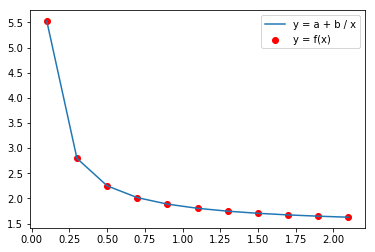

In [ ]:
linear_approx = lambda x: a + b / x

scatter(x, y, label='y = f(x)', color='red')
plot(x, list(map(linear_approx, x)), label='y = a + b / x')
legend()


<b>Задача 5.5.</b>
Известно, что $y=c_1 sin(aπx)+c_2 cos(bπx)$, где коэффициенты $c_1$ и $c_2$ подлежат определению.

Используя метод наименьших квадратов, определить $c_1$ и $c_2$.



In [ ]:
class Task3:
    x = np.linspace(-1.0, 1.1, 21)
    y = np.array(
        [
            -1.3111,
            -2.8426,
            -2.4981,
            -0.2912,
            2.3164,
            3.5128,
            2.3164,
            -0.2767,
            -2.5041,
            -2.8408,
            -1.3088,
            0.7309,
            1.6866,
            1.0946,
            -0.2552,
            -0.8962,
            -0.2370,
            1.0992,
            1.6841,
            0.7336,
            -1.2845
        ]
    )

In [ ]:
class TriPoly:
    def __init__(self, coefs=None):
        
        if coefs is None:
            self.c1, self.c2 = 1, 1
        else:
            assert len(coefs) == 2
            self.c1, self.c2 = coefs
        
        
    def apply(self, point):
        return self.c1 * np.sin(3 * np.pi * point), self.c2 * np.cos(2 * np.pi * point)
    
    def apply_and_sum(self, point):
        return np.sum(self.apply(point))
    
    def evaluate_in_points(self, points):
        return np.array(
            list(map(self.apply_and_sum, points))
        )
    
    def make_matrix(self, points):
        return np.array(
            list(map(self.apply, points))
        )
    
class GrahmTriSystem:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
        self.operator_matrix, self.result_vector = self._make_system()
        self.solution = np.linalg.solve(self.operator_matrix, self.result_vector)
        
        
    def _make_system(self):
        assert len(self.x) == len(self.y)
        
        poly = TriPoly()
        P = poly.make_matrix(self.x)
        
        grahm_matrix = P.T @ P
        result_vector = P.T @ self.y
        
        return grahm_matrix, result_vector    

In [ ]:
x = Task3.x
y = Task3.y

ts = GrahmTriSystem(x, y)
tripoly = TriPoly(ts.solution)


In [ ]:
print("c1 = {}, c2 = {}".format(*ts.solution))


c1 = 1.8899308773114765, c2 = -1.1877755731676198


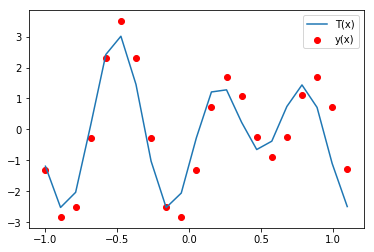

In [ ]:
scatter(x, y, label='y(x)', color='r')
plot(x, tripoly.evaluate_in_points(x), label='T(x)')
legend()


<b>Задача 5.8.</b>
Дана функция $y=f(x)$. Приблизить $f(x)$ методом глобальной интерполяции при равномерном и
чебышевском распределениях узлов интерполяции. Сравнить качество приближения.


$f(x) = sin(x^2), [-\pi, \pi]$


In [ ]:
from numpy.random import rand

def get_random_points_in_range(val_range, num_of_points, rand_type='uniform'):
    min_val, max_val = val_range
    
    def uniform_case():
        points = rand(num_of_points)
        return np.array(list(map(lambda x: min_val + (max_val - min_val) * x, points)))
    
    def chebyshev_case():
        points = np.asarray([np.cos((2 * i + 1) * np.pi / (2 * num_of_points)) for i in range(num_of_points)])
        return points * (max_val - min_val) / 2 + (max_val + min_val) / 2
    
    if rand_type == 'uniform':
        return uniform_case()
    elif rand_type == 'chebyshev':
        return chebyshev_case()
    else:
        raise ValueError("Wrong value of rand_type")


Составить программу-функцию построения интерполяционного многочлена при произвольном распределении
узлов (количество узлов - любое)

In [ ]:
def interpolate_and_show(num_of_nodes, node_dist_type, pol_size):
    x = np.sort(get_random_points_in_range([-np.pi, np.pi], num_of_nodes, node_dist_type))
    y = f(x)
    
    gs = GrahmSystem(x, y, pol_size)
    poly = Poly(pol_size, gs.solution)
    
    dense_x = np.linspace(-np.pi, np.pi, 4000)
    
    y_true = np.asarray(list(map(f, x)))
    y_interp = poly.evaluate_in_points(x)
    print("Loss is {}".format(norm(y_true - y_interp)))
    
    plot(dense_x, list(map(f, dense_x)), label='y(x)')
    plot(x, y_interp, label='P(x)')
    legend()


In [ ]:
def f(x):
    return np.sin(x ** 2)

base_num_of_nodes = 50
pol_size = 12

Используя составленную программу, вычислить приближенные значения функции $f(x)$ в $3k$ точках исходного
отрезка $[a, b]$ по $k$ узлам интерполяции, распределенным равномерно на отрезке.

На одном чертеже построить графики интерполяционного многочлена и исходной функции

Loss is 0.20448623125797108


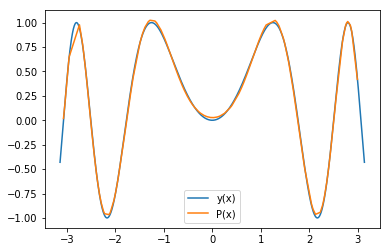

In [ ]:
interpolate_and_show(base_num_of_nodes * 3, 'uniform', pol_size)


Используя составленную программу, вычислить приближенные значения функции $f(x)$ в тех же $3k$ точках
исходного отрезка по $k$ узлам интерполяции, имеющим чебышевское распределение.

На одном чертеже построить графики интерполяционного многочлена и исходной функции.

Loss is 0.34425061204594004


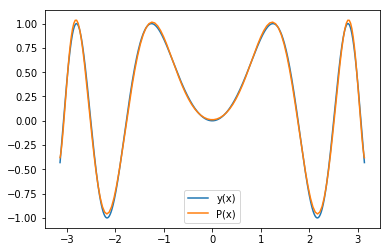

In [ ]:
interpolate_and_show(base_num_of_nodes * 3, 'chebyshev', pol_size)

На чебышевском распределении точек получается большая ошибка при интерполяции.

Loss is 0.18302476178348556


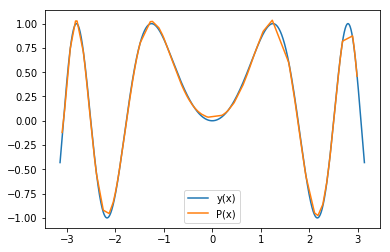

In [ ]:
interpolate_and_show(base_num_of_nodes * 2, 'uniform', pol_size)

Loss is 0.28107944771784427


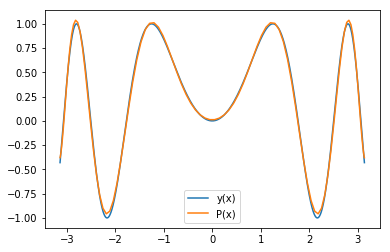

In [ ]:
interpolate_and_show(base_num_of_nodes * 2, 'chebyshev', pol_size)

При меньшем числе узлов ошибка меньше
